In [53]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# The first part is to build the framework of our linked list.
# For this part, it is not my original work.
# I borrow it from the data structure and algorithm course provided by Professor Chen Bin of PKU on MOOC.

class Vertex:
    def __init__(self, key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self, nbr):
        self.connectedTo[nbr] = 1

    def __str__(self):
        return str(self.id) + 'connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self, nbr):
        return self.connectedTo[nbr]

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self, key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self, n):
        return n in self.vertList

    def addEdge(self, f, t):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t])
        self.vertList[t].addNeighbor(self.vertList[f])

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

In [55]:
# After building the framework, we can import the data and fill in the linked list

data_h = pd.read_table("Homophyly.txt", header=None)

# This section is to adjusted our data to two columns. The first column is x, and the second is y.
# The reason why it looks so complicated is that the data can't be automatically added  to two columns
# by simply write data.columns = ['x', 'y'], but I don't know why.... Anyway, it can be done by a for loop as below.

data_h.columns = ['x']
data_h['y'] = None
for i in range(len(data_h)):
    coordinate = data_h['x'][i].split()
    data_h['x'][i] = coordinate[0]
    data_h['y'][i] = coordinate[1]

# Initialize our graph and add all edges.

G_h = Graph()
for i in range(len(data_h)):
    G_h.addEdge(data_h['x'][i], data_h['y'][i])

# Define a dictionary called "dict_v_deg", which is a dictionary with key - "vertex" and value - "degree".
# We count the degree of each node and store the corresponding "vertex" and "degree" in dictionary "dict_v_deg".

dict_v_deg = {}
for v_1 in G_h:
    count = 0
    for v_2 in v_1.getConnections():
        count +=1
    dict_v_deg[v_1.getId()] = count

# The next section is to extract all vertices into a set and ensure there is no repeating vertices.

deg_set = set([])
for key in dict_v_deg:
    deg_set.add(dict_v_deg[key])

# Define a dictionary called "dict_deg_freq", which is a dictionary with key - "degree" and value - "frequency".
# We count the frequency of each degree and store the corresponding "degree" and "frequency" in dictionary "dict_deg_freq".

dict_deg_freq = {}
for deg in deg_set:
    freq = 0
    for key in dict_v_deg:
        if dict_v_deg[key] == deg:
            freq += 1
    dict_deg_freq[deg] = freq

Text(0, 0.5, 'Frequency')

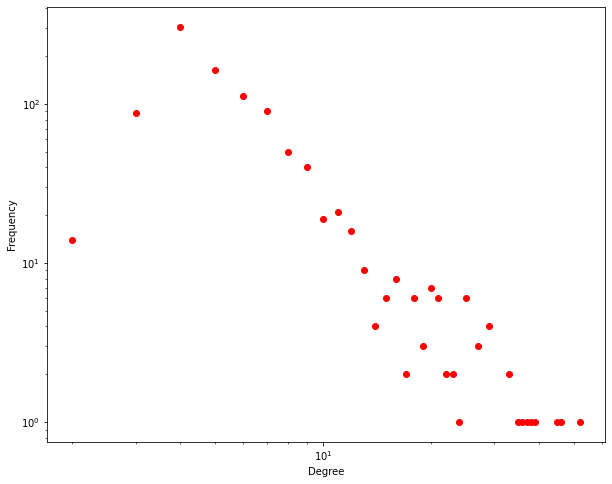

In [56]:
# We can plot the figure since we've got needed points. Let's treat the degree as x-axis and the frequency as y-axis.

plt.figure(figsize=(10, 8))
for key in dict_deg_freq:
    plt.loglog(key, dict_deg_freq[key], 'ro')
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Now, we've done! Congrats!

In [57]:
# Similarly, let's perform the same process as above, except the importing data part.
# For Amazon data, since the two columns are separated by \t, we can read it directly.

data_a = pd.read_table("Amazon.txt", header=None)
print(data_a)

data_a.columns = ['x', 'y']
print(data_a)

# The following part is the same as before.

G_a = Graph()
for i in range(len(data_a)):
    G_a.addEdge(data_a['x'][i], data_a['y'][i])

dict_v_deg = {}
for v_1 in G_a:
    count = 0
    for v_2 in v_1.getConnections():
        count +=1
    dict_v_deg[v_1.getId()] = count

deg_set = set([])
for key in dict_v_deg:
    deg_set.add(dict_v_deg[key])

dict_deg_freq = {}
for num in deg_set:
    freq = 0
    for key in dict_v_deg:
        if dict_v_deg[key] == num:
            freq += 1
    dict_deg_freq[num] = freq

            0       1
0          22  444558
1          22  511266
2          22  531052
3          34   48917
4          34   99853
...       ...     ...
94141  546425  547479
94142  546592  546839
94143  546904  547885
94144  547146  547551
94145  547299  547390

[94146 rows x 2 columns]
            x       y
0          22  444558
1          22  511266
2          22  531052
3          34   48917
4          34   99853
...       ...     ...
94141  546425  547479
94142  546592  546839
94143  546904  547885
94144  547146  547551
94145  547299  547390

[94146 rows x 2 columns]


Text(0, 0.5, 'Frequency')

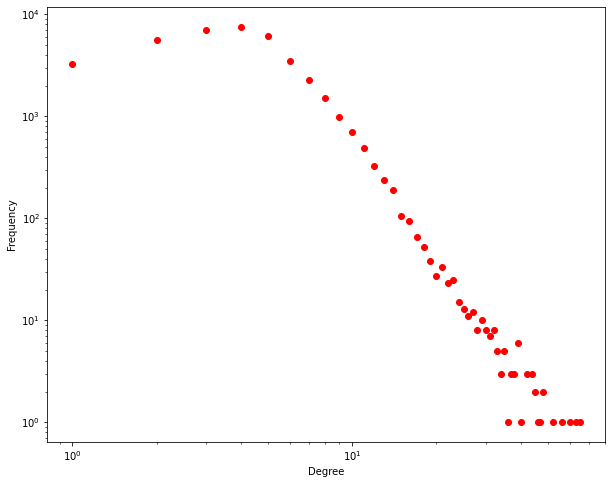

In [58]:
plt.figure(figsize=(10, 8))
for key in dict_deg_freq:
    plt.loglog(key, dict_deg_freq[key], 'ro')
plt.xlabel('Degree')
plt.ylabel('Frequency')